<br />

<h1 align="center">Predict Breast Cancer</h1>
<h5 align="center">by</h5>
<h3 align="center">Monde Anna</h3>

<br />
<br />


<p>We will predict the class of breast cancer from the features of images taken from breast samples. The classes to be predicted are:
    <ul>
        <li><b><i>Malignant:</i></b> The form we wish to avoid; or</li>
        <li><b><i>Benign:</i></b> Not as dangerous as the former</li>
    </ul>
</p>



<p>Here are <b><i>Sample IDs</i></b> and <b><i>nine</i></b> biological attributes of the cancer cell nuclei that have been calculated from the images:</p>

<br />
<br />


<table width="95%">
    <tr align="center">
        <th>Attribute</th>
        <th>Domain</th>
        <th>Attribute</th>
        <th>Domain</th>
    </tr>
    <tr align="center">
        <td>Sample Code Number</td>
        <td>ID Number</td>
        <td>Clumb Thickness</td>
        <td>1 - 10</td>
    </tr>
    <tr align="center">
        <td>Uniformity of Cell Size</td>
        <td>1 - 10</td>
        <td>Uniformity of Cell Shape</td>
        <td>1 - 10</td>
    </tr>
    <tr align="center">
        <td>Marginal Adhesion</td>
        <td>1 - 10</td>
        <td>Single Epithelial Cell Size</td>
        <td>1 - 10</td>
    </tr>
    <tr align="center">
        <td>Bare Nuclei</td>
        <td>1 - 10</td>
        <td>Bland Chromatin</td>
        <td>1 - 10</td>
    </tr>
    <tr align="center">
        <td>Normal Nucleoli</td>
        <td>1 - 10</td>
        <td>Mitoses</td>
        <td>1 - 10</td>
    </tr>
</table>
</font>

<br />
<br />


<p>The target being used for prediction is named class in the original <b><i>Class</i></b> schema, whereas we will refer to it as target, whereby:
    <ul>
        <li><b><i>Benign</i></b> is signified by 2</li>
        <li><b><i>Malignant</i></b> is signified by 4</li>
    </ul>
</p>

<br />
<br />


<h2 align="center">Source</h2>

<br />

<ul>
    <li><a href="http://syllabus.africacode.net/projects/data-science-specific/logistic-regression/breast-cancer/">Brief</a></li>
    <br />
    <li><a href="http://syllabus.africacode.net/projects/data-science-specific/logistic-regression/breast-cancer/cancer.data">Data</a></li>
</ul>

<br />
<br />


<h2 align="center">Imports</h2>

<br />
<br />


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


<br />

<h2 align="center">Global Settings</h2>

<br />
<br />


In [2]:
BOLD = "bold"
SMALL = 8
MEDIUM = 16
LARGE = 32

sns.set(rc={
    "axes.labelpad": MEDIUM,
    "axes.labelsize": MEDIUM,
    "axes.labelweight": BOLD,
    "axes.titlepad": MEDIUM,
    "axes.titlesize": LARGE,
    "axes.titleweight": BOLD,
    "figure.figsize": (MEDIUM, SMALL),
    "figure.titlesize": LARGE,
    "figure.titleweight": BOLD,
})


<br />

<h2 align="center">Data Prep</h2>

<br />
<br />


In [3]:
data = pd.read_csv("../data/cancer.data")
pd.concat([data.head(3), data.tail(3)], axis="rows")


,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


<br />

<h4 align="center">Initial Impressions</h4>

<br />

<ul>
    <li>The features look to reflect the proposed schema, as such we will assume the two to match</li>
    <br />
    <li>Feature naming needs to be attended to</li>
    <br />
    <li>The first feature falls outside the 1 - 10 range as well as not meeting the binary values of the target, as such we will consider this the <b><i>ID</i></b> feature; this feature is thus aligible to be dropped</li>
    <br />
    <li>The remaining features need to be checked for values that go against the proposed schema</li>
    <br />
    <li>Missing and null values also need be found</li>
    <br />
    <li>Bar <b><i>ID</i></b> (feature name 1000025) and <b><i>Target</i></b> (column 2.1), the data is ordinal</li>
    <br />
    <li><b><i>Target</i></b> (column 2.1) is binary</li>
</ul>

<br />
<br />


<h3 align="center">Feature Renaming</h3>

<br />
<br />


In [4]:
new_feature_names = [
    "sample_id",
    "clumb_thickness",
    "cell_size_uniformity",
    "cell_shape_uniformity",
    "marginal_adhesion",
    "single_epithelial_cell_size",
    "bare_nuclei",
    "bland_chromatin",
    "normal_nucleoli",
    "mitoses",
    "target",
]

data.columns = new_feature_names
pd.concat([data.head(3), data.tail(3)], axis="rows").iloc[:, :8]


,sample_id,clumb_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin
0,1002945,5,4,4,5,7,10,3
1,1015425,3,1,1,1,2,2,3
2,1016277,6,8,8,1,3,4,3
695,888820,5,10,10,3,7,3,8
696,897471,4,8,6,4,3,4,10
697,897471,4,8,8,5,4,5,10


<br />

<h3 align="center">Removal</h3>
<h5 align="center">of</h5>
<h3 align="center">Identifier Features</h3>
<h5 align="center">and</h5>
<h3 align="center">Duplicates</h3>

<br />
<br />

<p>As luck would have it, only the <b><i>Sample ID</i></b> feature could possibly be used to indentify the data's source. Prior to removing this feature, it would be benefitial to use it as a way of identifying any duplicates.</p>

<br />
<br />


In [5]:
assert data["sample_id"].duplicated().any(), "There are no duplicates in Sample ID"

data.drop_duplicates(inplace=True)
data.drop(columns=["sample_id"], inplace=True)


<br />

<h3 align="center">Descriptive Statistics</h3>

<br />
<br />


<h4 align="center">Data Types</h4>
<h5 align="center">and</h5>
<h4 align="center">Null Counts</h4>

<br />
<br />


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clumb_thickness              690 non-null    int64 
 1   cell_size_uniformity         690 non-null    int64 
 2   cell_shape_uniformity        690 non-null    int64 
 3   marginal_adhesion            690 non-null    int64 
 4   single_epithelial_cell_size  690 non-null    int64 
 5   bare_nuclei                  690 non-null    object
 6   bland_chromatin              690 non-null    int64 
 7   normal_nucleoli              690 non-null    int64 
 8   mitoses                      690 non-null    int64 
 9   target                       690 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.3+ KB


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>There are no null values; recall that numpy's <b>NaN</b> value is a float type</li>
    <br />
    <li>There look to be no explicitly missing values</li>
    <br />
    <li>Other than <b><i>Bare Nuclei</i></b>, the feature set is made up of 64-bit integers</li>
    <br />
    <li>We will have to transform the data type of <b><i>Bare Nuclei</i></b> to 64-bit integers as well so as to match the schema's proposal</li>
    <br />
    <li><b><i>Bare Nuclei's</i></b> data type means non-digit strings are best treated as null values; should there be non-digit values, then the feature will have to become float type</li>
</ul>

<br />
<br />


<h4 align="center">Feature Type Conversion</h4>
<h4 align="center">Bare Nuclei</h4>

<br />
<br />


In [7]:
data["bare_nuclei"] = data["bare_nuclei"].apply(
    lambda x: np.int64(x) if x.isdigit() else np.nan
)


<br />

<h4 align="center">Null Value Perusal</h4>

<br />
<br />


In [8]:
null_value_count = data.isna().sum()

null_value_count_total = null_value_count[null_value_count.values > 0]
null_value_count_total.index = [
    name + "_count"
    for name in null_value_count_total.index
]

null_value_count_proportion = null_value_count_total / data.shape[0]
null_value_count_proportion.index = [
    name.rstrip("_count") + "_proportion"
    for name in null_value_count_proportion.index
]

pd.DataFrame(
    data=pd.concat([null_value_count_total, null_value_count_proportion], axis="rows"),
    columns=["values"],
)


,values
bare_nuclei_count,16.000000
bare_nuclei_proportion,0.023188


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>There's a fairly minimal number of null value, essentially making up <b><i>2.32%</i></b>, rounded, of the data set</li>
    <br />
    <li>The suspicion is that this will have little impact and as such will be dropped</li>
</ul>

<br />
<br />


<h4 align="center">Drop Rows with Null Values</h4>

<br />
<br />


In [9]:
data.dropna(axis="rows", inplace=True)


<br />

<h4 align="center">Measure of Spread</h4>
<h4 align="center">Target</h4>

<br />
<br />


In [10]:
target_feature = data["target"]

target_description = pd.DataFrame(target_feature.describe()).T
target_description["unique values"] = [target_feature.unique()]
target_description[["number of 2's", "number of 4's"]] = target_feature.value_counts().values

target_description


,count,mean,std,min,25%,50%,75%,max,unique values,number of 2's,number of 4's
target,674.0,2.700297,0.954741,2.0,2.0,2.0,4.0,4.0,"[2, 4]",438,236


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>All as suggested in the schema</li>
    <br />
    <li>There are more <b><i>2's</i></b> than <b><i>4's</i></b></li>
</ul>

<br />
<br />


<h4 align="center">Map Targets</h4>

<br />

<ul>
    <li>To recap:
        <ul>
            <li>2 means <b>Benign</b></li>
            <li>4 <b>Malignant</b></li>
        </ul>
    </li>
    <br />
    <li>The target values are mapped as:
        <ul>
            <li>2 becomes <b>0</b>: Generally regarded as being <b>False</b></li>
            <li>4 becomes <b>1</b>: Typical numeric standing for <b>True</b></li>
        </ul>
    </li>
</ul>

<br />
<br />


In [11]:
data["target"] = data["target"].map({2:0, 4:1})


<br />

<h4 align="center">Measure of Spread</h4>
<h4 align="center">Independent Features</h4>

<br />
<br />


In [12]:
independent_features = data.drop(columns=["target"])

q1 = independent_features.quantile(0.25)
q3 = independent_features.quantile(0.75)

iqrs = pd.DataFrame(
    data=q3-q1,
    columns=["IQR"]
).T

mode = independent_features.mode()
mode.index = ["mode"]

independent_features_description = pd.concat(
    objs=[independent_features.describe(), mode, iqrs],
    axis="rows"
)

independent_features_description.T


,count,mean,std,min,25%,50%,75%,max,mode,IQR
clumb_thickness,674.0,4.451039,2.822875,1.0,2.0,4.0,6.0,10.0,1.0,4.0
cell_size_uniformity,674.0,3.149852,3.056152,1.0,1.0,1.0,5.0,10.0,1.0,4.0
cell_shape_uniformity,674.0,3.212166,2.977544,1.0,1.0,1.0,5.0,10.0,1.0,4.0
marginal_adhesion,674.0,2.851632,2.877169,1.0,1.0,1.0,4.0,10.0,1.0,3.0
single_epithelial_cell_size,674.0,3.231454,2.209628,1.0,2.0,2.0,4.0,10.0,2.0,2.0
bare_nuclei,674.0,3.541543,3.639256,1.0,1.0,1.0,6.0,10.0,1.0,5.0
bland_chromatin,674.0,3.443620,2.455657,1.0,2.0,3.0,5.0,10.0,2.0,3.0
normal_nucleoli,674.0,2.888724,3.067021,1.0,1.0,1.0,4.0,10.0,1.0,3.0
mitoses,674.0,1.608309,1.742142,1.0,1.0,1.0,1.0,10.0,1.0,0.0


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>All features fall within the proposed range of 1 - 10 as shown by the <i>minimum</i> and <i>maximum</i> values</li>
    <br />
    <li><b><i>Clumb Thickness</i></b>, <b><i>Single Epithelial Cell Size</i></b> and <b><i>Bland Chromatin</i></b> show an interesting deviation from the rest of the features:
        <ul>
            <li>All three feature have <b>Q1</b> being equal to 2</li>
            <li>The rest of the feature set has <b>Q1</b> being equal to 1</li>
        </ul>
    </li>
    <br />
    <li>Features with a <b>Q1</b> value of 1 have a large <b>standard deviation</b>:
        <ul>
            <li><b><i>Marginal Adhesion</i></b>, <b><i>Bare Nuclei</i></b>, <b><i>Normal Nucleoli</i></b> and <b><i>Mitoses</i></b> in particular are interesting; <b>standard deviation</b> is greater than <b>mean</b></li>
            <li>The rest of the feature set have <b>standard deviations</b> that are pretty close to their respective <b>means</b></li>
        </ul>
    </li>
    <br />
    <li>Considering the wild <b>standard deviation</b> values, it would likely be best to use the median (<b>Q2</b>) or maybe the mode as a way of describing central tendencies</li>
    <br />
    <li><b><i>Single Epithelial Cell Size</i></b> and <b><i>Bland Chromatin</i></b> have a mode of <b><i>2</i></b> and whereas all other features have a mode of <b><i>1</i></b></li>
    <br />
    <li>This matter with the mean as well as there being more <b><i>2's</i></b> than <b><i>4's</i></b> suggests that we keep in mind the likelihood of highly skewed data and a possible need for feature scaling</li>
    <br />
    <li>All <b>Q3's</b> are either <b><i>6</i></b> or below</li>
    <br />
    <li>We can, from the <b>IQR's</b> easily infer that all data is right skewed</li>
    <br />
    <li><b><i>Mitoses</i></b> is of particular interest as it has no <b>IQR</b></li>
</ul>

<br />
<br />


<h4 align="center">Visual Confirmation of Measure of Spread</h4>
<h5 align="center">for</h5>
<h4 align="center">Independent Features</h4>

<br />
<br />


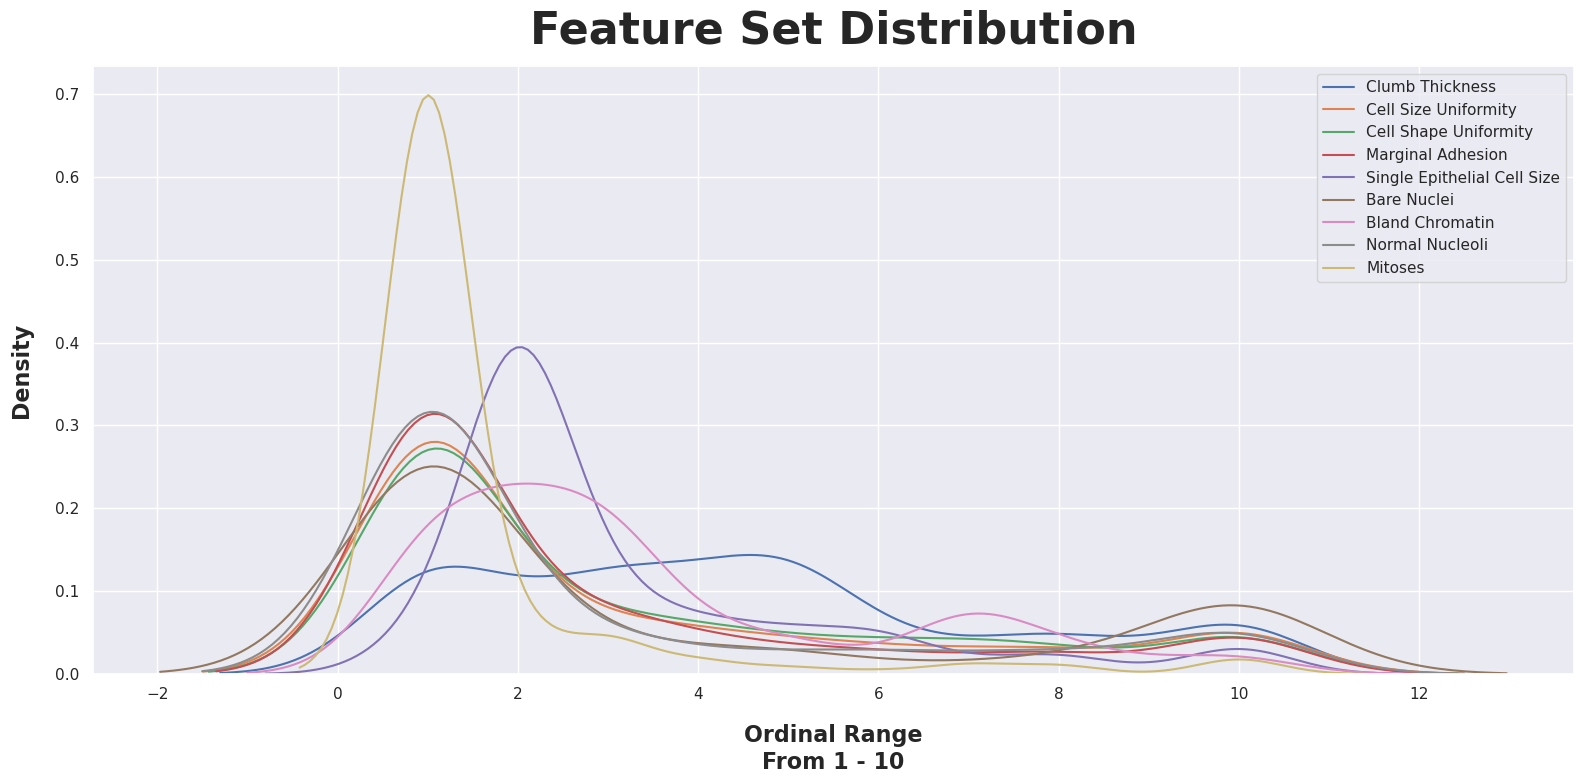

In [13]:
for feature in independent_features.columns:
    sns.kdeplot(data=independent_features[feature])

plt.title("Feature Set Distribution")

plt.xlabel("Ordinal Range\nFrom 1 - 10")
plt.ylabel("Density")

legends = [
    name.replace("_", " ").title()
    for name in independent_features.columns
]

plt.legend(legends)

plt.tight_layout()
plt.show()


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>The visuals pretty much mirror the inferences previously made</li>
</ul>

<br />
<br />


<h2 align="center">Feature Selection</h2>

<br />
<br />


<h3 align="center">R<sup>2</sup> Correlational Heatmap</h3>

<br />

<ul>
    <br />
    <li>Metrics for R<sup>2</sup> as explained by <b><i>Cohen (1988)</i></b>:
        <ul>
            <li>0.01 &lt; r<sup>2</sup> &lt; 0.10: Weak Effect</li>
            <li>0.10 &le; r<sup>2</sup> &lt; 0.25: Moderate Effect</li>
            <li>r<sup>2</sup> &ge; 0.25: Strong Effect</li>
        </ul>
    </li>
    <br />
    <li><b><i>Note:</i></b> The breakdown of the effect ranges is conventional</li>
    <br />
    <li><b><i>Note:</i></b> By default, <i>pandas'</i> correlation algorithm uses a <b><i>Pearson</i></b> model</li>
</ul>

<br />
<br />


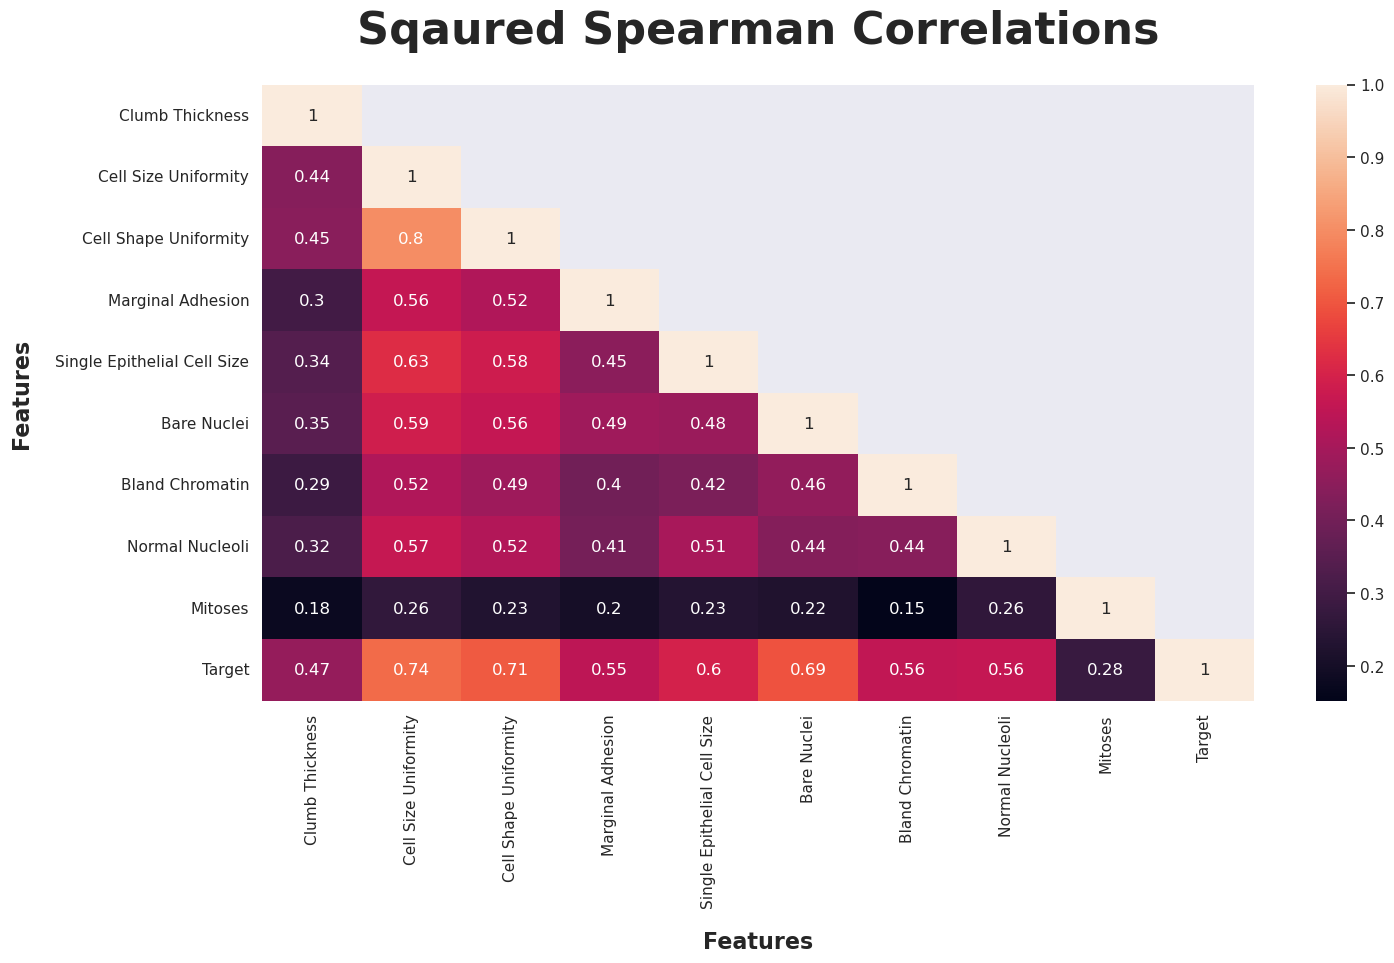

In [14]:
correlations = data.corr(method="spearman").apply(np.square)

mask = np.triu(correlations)
np.fill_diagonal(a=mask, val=False)

correlation_heatmap = sns.heatmap(
    data=correlations,
    annot=True,
    mask=mask,
)

labels = [
    tick.replace("_", " ").title()
    for tick in data.columns 
]

correlation_heatmap.set_title("Sqaured Spearman Correlations", y=1.03125)

correlation_heatmap.set_xlabel("Features")
correlation_heatmap.set_ylabel("Features")

correlation_heatmap.set_xticklabels(labels)
correlation_heatmap.set_yticklabels(labels)

plt.show()


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>Bar <b><i>Mitoses</i></b>, the other features show strong correlation to <b><i>Target</i></b></li>
    <br />
    <li><b><i>Cell Size Uniformity</i></b> and <b><i>Cell Shape Uniformity</i></b> are highly correlated:
        <ul>
            <li>with <b><i>Cell Shape Uniformity</i></b> having a lower correlation, we shall drop it</li>
        </ul>
    </li>
    <br />
    <li>When viewed in relation to <b><i>Cell Size Uniformity</i></b>, essentially all the other features show high correlation, ranging from <b>0.48</b> to <b>0.54</b></li>
    <br />
    <li>To solidify how we need only use the <b><i>Cell Size Uniformity</i></b> feature, we will create a baseline model with all featues and compare the r<sup>2</sup> values</li>
</ul>

<br />
<br />

<b><i></i></b>

<h3 align="center">Confusion Matrices</h3>

<br />
<br />


In [15]:
X_all = data.drop(columns=["target"])
X_uniformity = data["cell_size_uniformity"]
y = data["target"]


<br />

<h4 align="center">All Feature Model Train-Test Split</h4>

<br />
<br />


In [17]:
X_all_split = train_test_split(X_all, y, test_size=0.25, random_state=666)
X_all_train, X_all_test, y_all_train, y_all_test = X_all_split

X_all_model = LogisticRegression().fit(X_all_train, y_all_train)
y_all_pred = X_all_model.predict(X_all_test)


<br />

<h4 align="center">Split Size Uniformity Train-Test Split</h4>

<br />
<br />


In [18]:
X_uniformity_split = train_test_split(X_uniformity, y, test_size=0.25, random_state=666)
X_uniformity_train, X_uniformity_test, y_uniformity_train, y_uniformity_test = X_uniformity_split

X_uniformity_train = X_uniformity_train.values.reshape(-1, 1)
X_uniformity_test = X_uniformity_test.values.reshape(-1, 1)

X_uniformity_model = LogisticRegression().fit(X_uniformity_train, y_uniformity_train)
y_uniformity_pred = X_uniformity_model.predict(X_uniformity_test)


<br />

<h4 align="center">Matrices</h4>

<br />
<br />


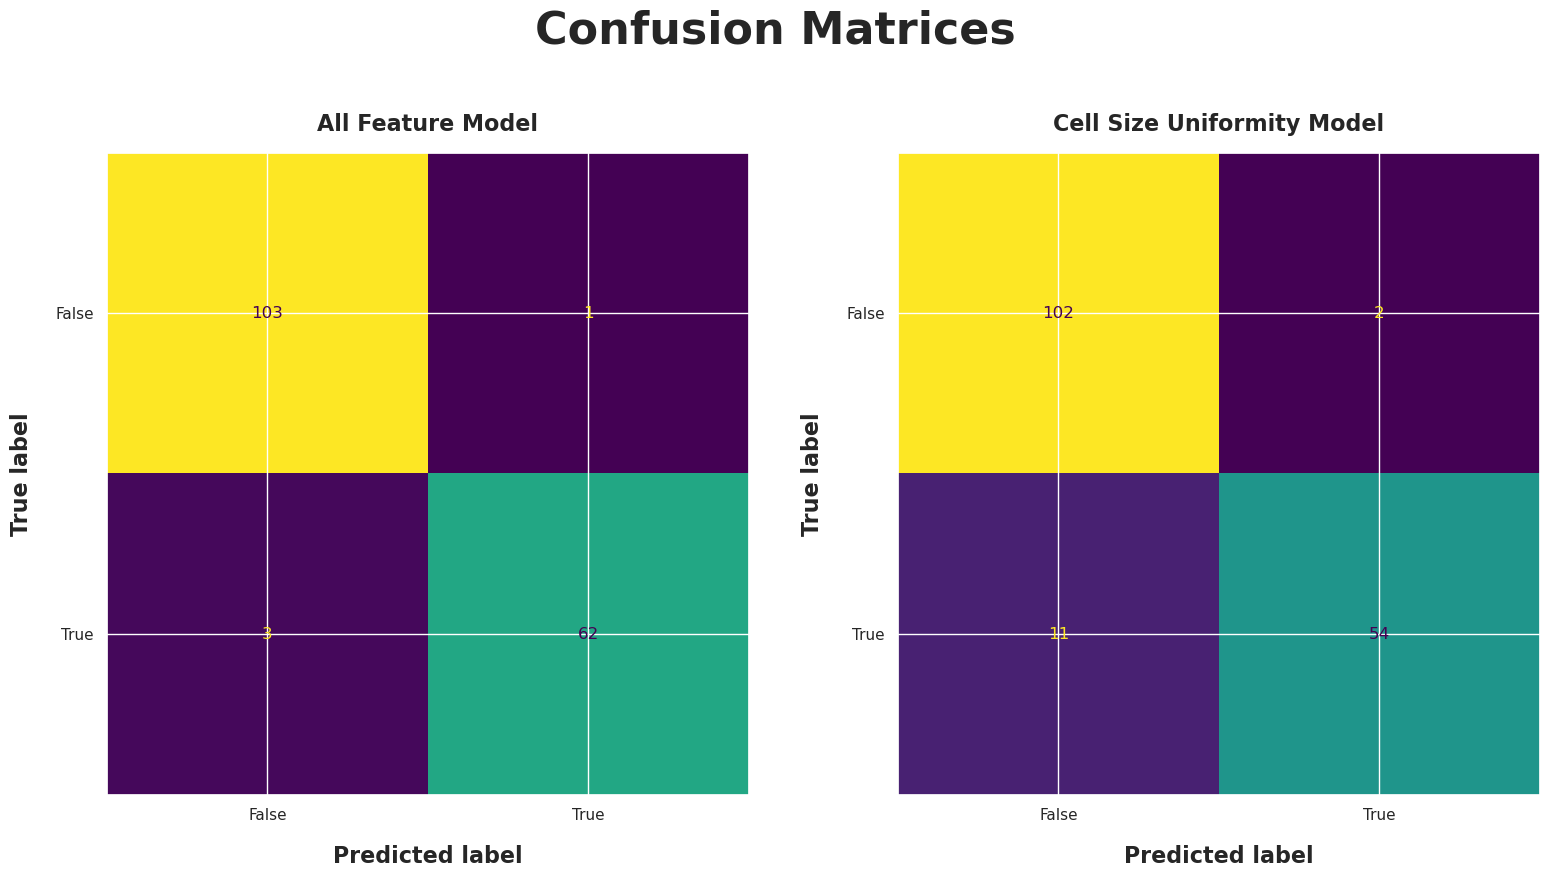

In [19]:
display_labels = ("False", "True")

model_outcomes = (
    {
        "model": X_all_model,
        "X": X_all_test,
        "y": y_all_test,
    },
    {
        "model": X_uniformity_model,
        "X": X_uniformity_test,
        "y" :y_uniformity_test,
    }
)

fig, ax = plt.subplots(nrows=1, ncols=2)

for index, outcome in enumerate(model_outcomes):
    ConfusionMatrixDisplay.from_estimator(
        estimator=outcome["model"],
        X=outcome["X"],
        y=outcome["y"],
        ax=ax[index],
        colorbar=False,
        display_labels=display_labels,
    )

ax[0].set_title("All Feature Model", fontsize=MEDIUM)
ax[1].set_title("Cell Size Uniformity Model", fontsize=MEDIUM)

plt.suptitle("Confusion Matrices", y=1.0625)

plt.tight_layout()
plt.show()


<br />

<h4 align="center">Observations</h4>

<br />

<ul>
    <li>As per the initial suspecion, <b><i>Cell Size Uniformity</i></b> offers similar results to using the entire feature set when making a model</li>
    <br />
    <li>The short comings of <b><i>Cell Size Uniformity</i></b> can be found in it having a higher likelihood to produce <b><i>False Positives</i></b></li>
</ul>

<br />
<br />

<b><i></i></b>